# About



```
  Naveen,Kailash -> PreProcessing
  Mahesh, Ajay   -> Visualisation
  
```
Dataset        -> https://www.kaggle.com/mlg-ulb/creditcardfraud



# Pre-Processing 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

In [2]:
driveURL = 'https://drive.google.com/file/d/1P4DpRVjFO0V9PtlPyeq9WQNzPzCQpWNG/view?usp=sharing'
PATH = 'https://drive.google.com/uc?id=' + driveURL.split('/')[-2]
df = pd.read_csv(PATH)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Knowing The Dataframe

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277837576,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,NaN,NaN,NaN,NaN,NaN
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638671953,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,NaN,NaN,NaN,NaN,NaN
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679402,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,NaN,NaN,NaN,NaN,NaN
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005273597,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,NaN,NaN,NaN,NaN,NaN
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278495,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(284807, 36)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 36 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Time         284807 non-null  float64
 1   V1           284807 non-null  float64
 2   V2           284807 non-null  float64
 3   V3           284807 non-null  float64
 4   V4           284807 non-null  float64
 5   V5           284807 non-null  float64
 6   V6           284807 non-null  float64
 7   V7           284807 non-null  float64
 8   V8           284807 non-null  float64
 9   V9           284807 non-null  float64
 10  V10          284807 non-null  float64
 11  V11          284807 non-null  float64
 12  V12          284807 non-null  float64
 13  V13          284807 non-null  float64
 14  V14          284807 non-null  float64
 15  V15          284807 non-null  float64
 16  V16          284807 non-null  float64
 17  V17          284807 non-null  float64
 18  V18          284807 non-

In [6]:
df.isnull().sum()

Time                0
V1                  0
V2                  0
V3                  0
V4                  0
V5                  0
V6                  0
V7                  0
V8                  0
V9                  0
V10                 0
V11                 0
V12                 0
V13                 0
V14                 0
V15                 0
V16                 0
V17                 0
V18                 0
V19                 0
V20                 0
V21                 0
V22                 1
V23                 1
V24                 1
V25                 1
V26                 1
V27                 1
V28                 1
Amount              1
Class               1
Unnamed: 31    284806
Unnamed: 32    284806
Unnamed: 33    284806
Unnamed: 34    284806
Unnamed: 35    284806
dtype: int64

In [7]:
df[['Amount', 'Class','Time']].describe()

,Amount,Class,Time
count,284806.000000,284806.000000,284807.000000
mean,88.349014,0.001724,94813.859575
std,250.120435,0.041569,47488.145955
min,0.000000,-0.993479,0.000000
25%,5.592500,0.000000,54201.500000
50%,22.000000,0.000000,84692.000000
75%,77.160000,0.000000,139320.500000
max,25691.160000,1.000000,172792.000000


Cleaning The Dataframe

In [8]:
data = df[['Amount', 'Class']]
df2 = data.fillna(0.0)
df2.isnull().sum()

Amount    0
Class     0
dtype: int64

In [9]:
df = df.dropna(axis=1)
df = df.join(df2)

In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
Amount    0
Class     0
dtype: int64

In [11]:
df.drop(df[df['Class'] < 0].index, inplace=True)
df.Class.value_counts()

0.0    284314
1.0       492
Name: Class, dtype: int64

Getting Insights From The Dataframe

In [12]:
df.loc[df['Amount'] > 150, ['Time', 'Class']].head(20)

,Time,Class
2,1.0,0.0
20,16.0,0.0
51,36.0,0.0
60,41.0,0.0
64,42.0,0.0
85,55.0,0.0
89,59.0,0.0
103,69.0,0.0
134,83.0,0.0
140,87.0,0.0


In [13]:
df.loc[df['Class'] == 1.0, ['Class', 'Amount']]

,Class,Amount
541,1.0,0.00
623,1.0,529.00
2933,1.0,239.93
6108,1.0,59.00
6329,1.0,1.00
...,...,...
279863,1.0,390.00
280143,1.0,0.76
280149,1.0,77.89
281144,1.0,245.00


In [14]:
fraudAmount = df.loc[df['Class'] == 1.0, 'Amount'].sum()
print('The Fraud Amount is ' + str(fraudAmount))

The Fraud Amount is 60127.97


In [15]:
fraudMaxAmount = df.loc[df['Class'] == 1.0, 'Amount'].max()
print('The Maximum Fraud Amount is ' + str(fraudMaxAmount))

The Maximum Fraud Amount is 2125.87


In [16]:
fraudMinAmount = df.loc[df['Class'] == 1.0, 'Amount'].min()
print('The Minimum Fraud Amount is ' + str(fraudMinAmount))

The Minimum Fraud Amount is 0.0


In [17]:
pd.crosstab(df.Class, df.Amount)

Amount,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,...,5680.00,5707.82,5714.20,5714.58,5918.00,5934.90,5964.95,6000.00,6130.21,6239.54,6454.74,6511.00,6652.89,6669.00,6828.00,6900.47,6950.51,6982.67,6998.00,7367.00,7429.15,7541.70,7583.32,7636.30,7712.43,7766.60,7862.39,7879.42,8182.70,8360.00,8787.00,8790.26,10000.00,10199.44,11789.84,11898.09,12910.93,18910.00,19656.53,25691.16
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,1799,713,85,3,11,44,3,11,10,2,34,23,234,5,5,19,2,7,1,4,6,36,51,10,5,3,7,13,1,13,16,7,6,1,3,5,10,12,10,4,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1.0,27,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
pd.crosstab(df.Class, df.Amount, margins=True).transpose()

Class,0.0,1.0,All
Amount,,,
0.0,1799,27,1826
0.01,713,5,718
0.02,85,0,85
0.03,3,0,3
0.04,11,0,11
...,...,...,...
12910.93,1,0,1
18910.0,1,0,1
19656.53,1,0,1


It has been shown that, the fraud amount is less than 2200.0 for all transactions given in the dataset. 

In [19]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,
0.0,94838.523080,0.008260,-0.006275,0.012166,-0.007862,0.005452,0.002419,0.009634,-0.000986,0.004461,0.009824,-0.006576,0.010839,0.000180,0.012059,0.000159,0.007166,0.011530,0.003893,-0.001185,-0.000544,-0.001232,88.290414
1.0,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,122.211321


Using SMOTE for Unbalance dataset

In [20]:
df.shape

(284806, 24)

In [21]:
X1 = df.drop(columns='Class', axis=1)
y1 = df['Class']
X1.shape, y1.shape

((284806, 23), (284806,))

0 Normal Transaction
1 Fraud Transaction

In [22]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]
print(legit.shape)
print(fraud.shape)

(284314, 24)
(492, 24)


Statistical Measure of the data

In [23]:
legit.Amount.describe()

count    284314.000000
mean         88.290414
std         250.105419
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [24]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

# EDA - 1

Exploratory Data Analysis, is the act of analyzing a dataset to understand the main statistical characteristics with visual and statistical methods.

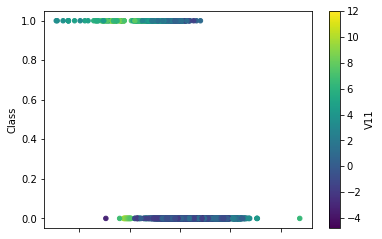

In [25]:
df.plot.scatter(x='V10',y='Class',c='V11',colormap='viridis')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


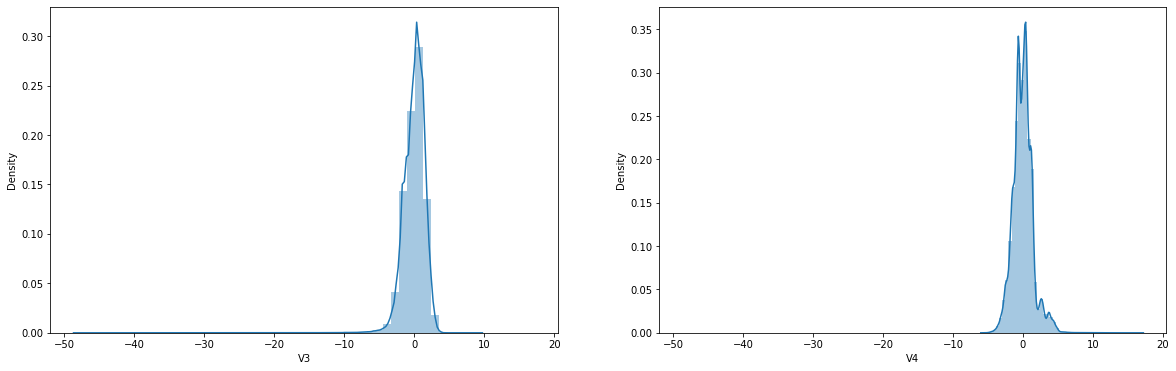

In [26]:
f, axes = plt.subplots(1, 2, figsize=(20, 6), sharex=True)
sns.distplot(df['V3'],ax=axes[0])
sns.distplot(df['V4'],ax=axes[1])

plt.show()
plt.clf()
plt.close()

Scatter plots are useful to show individual values plot on a two dimensional cartesian X & Y plane from two Series in a Pandas DataFrame.

Pair plots can play a similar role to individual scatter plots as they provide a variety of visualizations

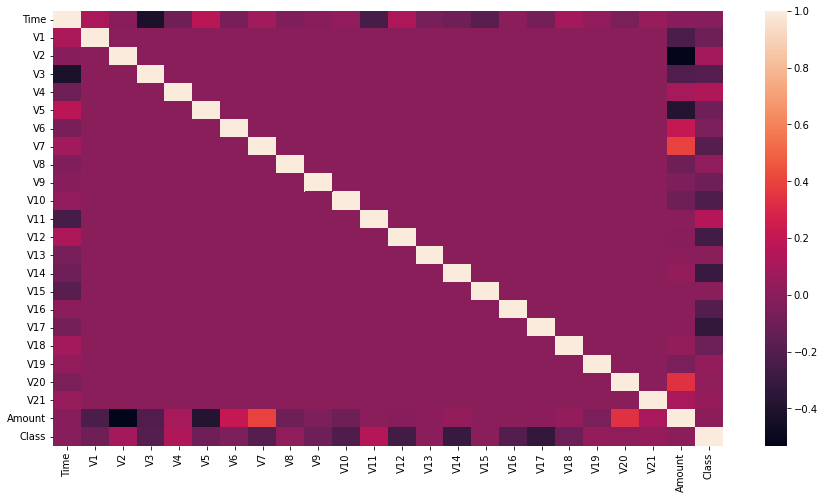

In [27]:
f, ax = plt.subplots(figsize=(15, 8))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#Visualization 1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


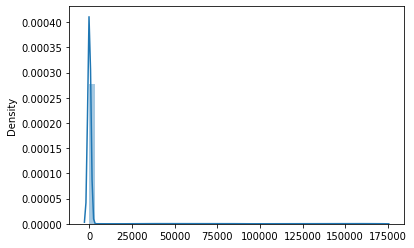

In [28]:
sns.distplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


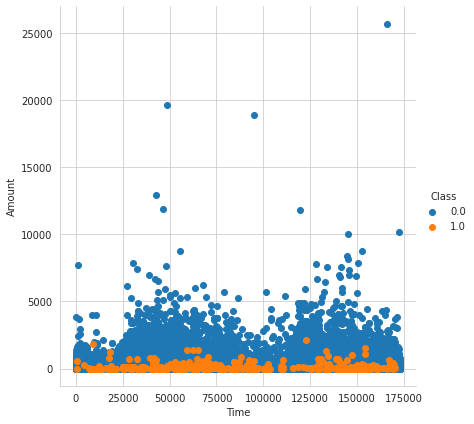

In [29]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

From the above two plots it is clearly visible that there are frauds only on the transactions which have transaction amount approximately less than 2500. Transactions which have transaction amount approximately above 2500 have no fraud

In [30]:
#3d plotting
FilteredData = df[['Time','Amount', 'Class']]
FilteredData.head()

,Time,Amount,Class
0,0.0,149.62,0.0
1,0.0,2.69,0.0
2,1.0,378.66,0.0
3,1.0,123.50,0.0
4,2.0,69.99,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


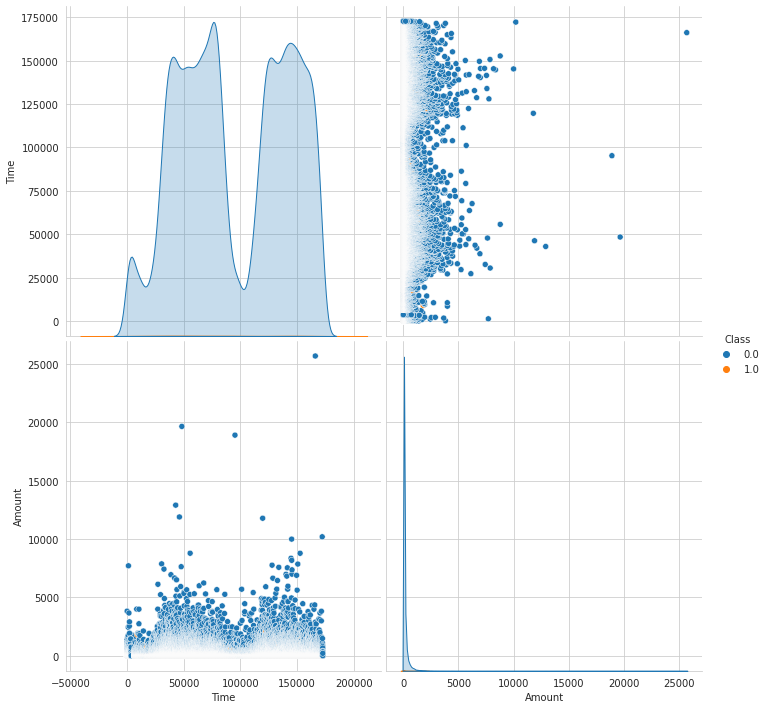

In [31]:
plt.close()
sns.set_style("whitegrid");
sns.pairplot(FilteredData, hue="Class", size=5);
plt.show();

In [32]:
 class0 = 0
class1 = 0
for i in range(284806):
    if(FilteredData.iloc[i]["Amount"] < 2500):
        if(FilteredData.iloc[i]["Class"] == 0):
            class0 = class0 + 1
        else:
            class1 = class1 + 1
        
print(class0)
print(class1)

283865
492


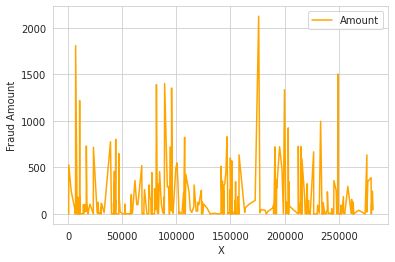

In [33]:
fraudAmt = df.loc[df['Class'] == 1.0, ['Amount']]
plt.xlabel('X')
plt.ylabel('Fraud Amount')
plt.plot(fraudAmt, color="orange")
plt.legend(['Amount'])
plt.show()

Now the total number of fraud transactions in whole data are 492. It has been calculated that total number of fraud transactions in data where transaction amount is less than 2500 is also 492. Therefore, all 100% fraud transactions have transaction amount less than 2500 and there is no fraud transaction where transaction amount is more than 2500.

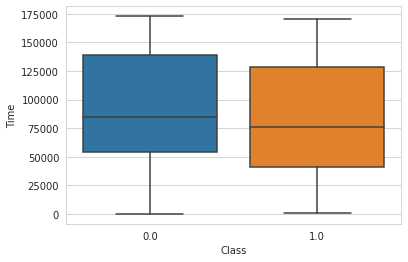

In [34]:
sns.boxplot(x = "Class", y = "Time", data = df)
plt.show()

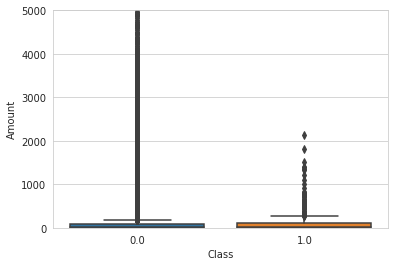

In [35]:
sns.boxplot(x = "Class", y = "Amount", data =df)
plt.ylim(0, 5000)
plt.show()

 This shows that there is no transaction fraud above 2500 all the frauds are below 2500

#Visualization 2

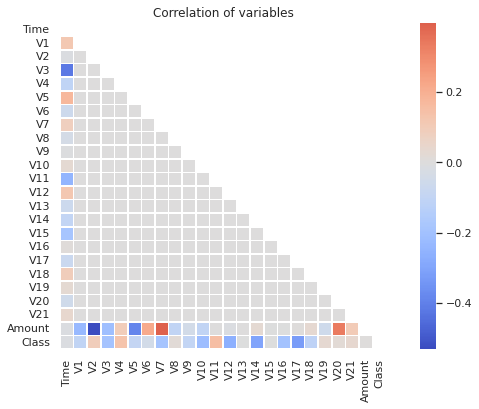

In [36]:
import numpy as np # linear algebra
import pandas as pd # dataframes
import matplotlib # helping the plotting
import matplotlib.pyplot as plt  
import missingno as mno # plot missing numbers
import seaborn as sns 
sns.set_style('darkgrid')
import plotly.express as px
import matplotlib.colors as cl

plt.figure(figsize = (12,6))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set(style = 'whitegrid')
sns.heatmap(corr, mask=mask, 
            cmap='coolwarm', 
            center=0,
            square=True, 
            linewidths=.6)
plt.title("Correlation of variables")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

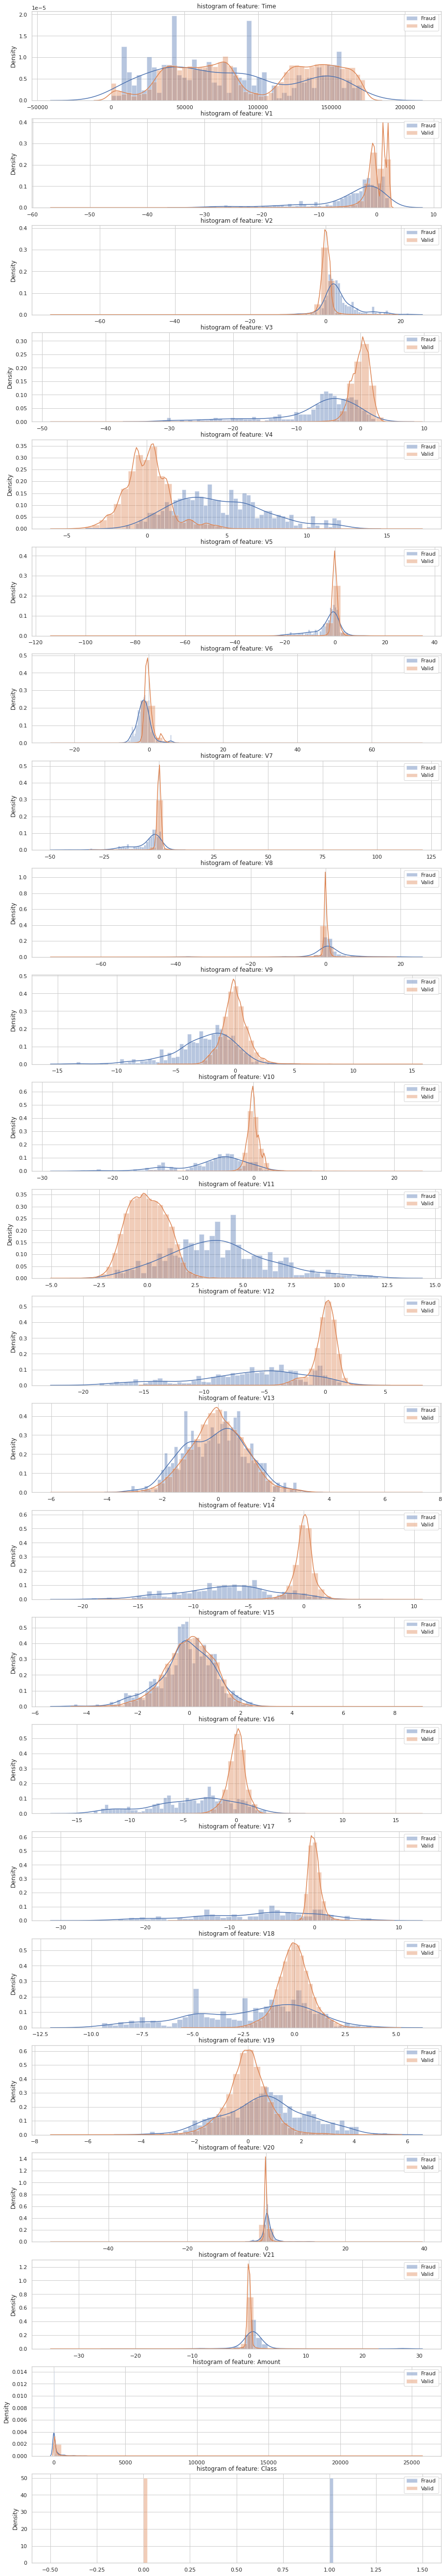

In [37]:
features = df.iloc[:,0:29].columns
plt.figure(figsize=(15,29*4))
gs = gridspec.GridSpec(29, 1)
for i, c in enumerate(df[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[c][df.Class == 1], bins=50,label='Fraud')
    sns.distplot(df[c][df.Class == 0], bins=50,label="Valid")
    ax.legend()
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(c))
plt.show()

differences between the densities of Fraud and Valid classes. Valid cases are usually concentrated together and hence have sharp density plots whereas Fraud transactions are more spread out.

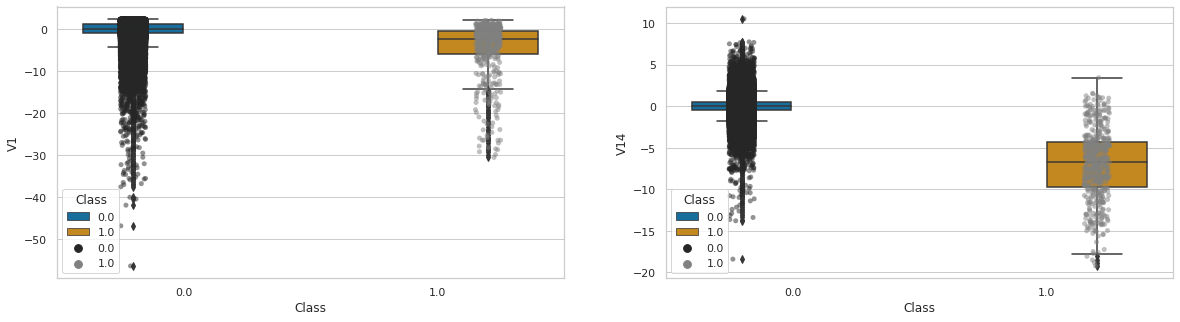

In [38]:
cols = ['V1', 'V14']
f, axes = plt.subplots(1, 2, figsize=(20, 5), sharex=True)
for index,col in enumerate(cols):
    sns.boxplot(x="Class", y=col, hue="Class", palette="colorblind", data=df, ax=axes[index]) 
    sns.stripplot(x='Class', y=col,  data=df,dodge=True,jitter=True,marker='o',ax=axes[index],alpha=0.5,color='grey',hue='Class')
plt.show()
plt.clf()
plt.close()

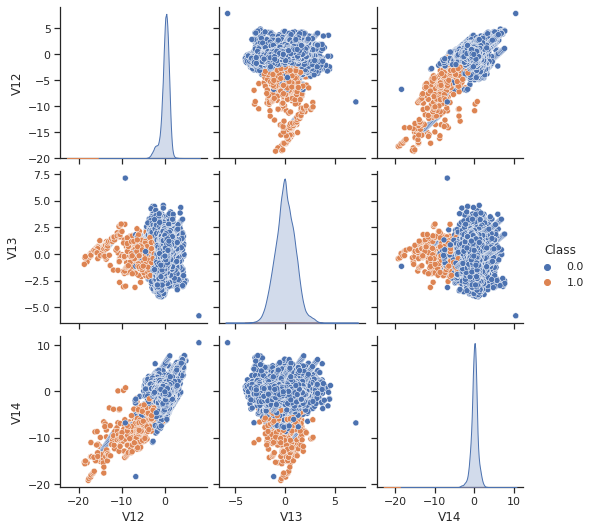

In [39]:
sns.set(style="ticks")
sns.pairplot(df[["V12","V13","V14","Class"]], hue="Class")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



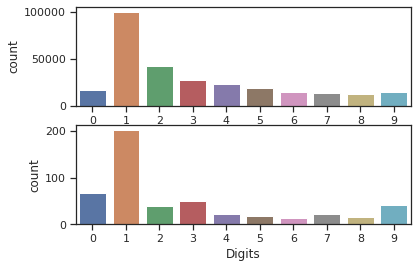

In [40]:
dft = df[["Amount","Class"]].copy()
dft['Digits'] = dft.Amount.astype(str).str[:1].astype(int)

plt.subplot(211)
sns.countplot(dft[dft.Class == 0].Digits)

plt.subplot(212)
sns.countplot(dft[dft.Class == 1].Digits)

Benford’s Law, also known as the Law of First Digits or the Phenomenon of Significant Digits, is the finding that the first digits (or numerals to be exact) of the numbers found in series of records of the most varied sources do not display a uniform distribution, but rather are arranged in such a way that the digit “1” is the most frequent, followed by “2”, “3”, and so in a successively decreasing manner down to “9”.

We can see that the fraudulent transactions fail to follow this law, hence we can infer that something is wrong with those transactions.

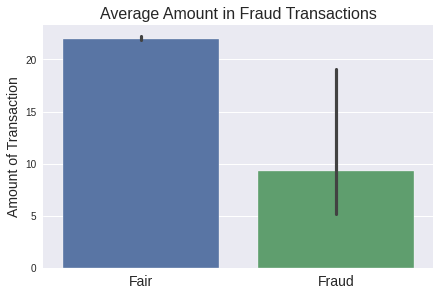

In [41]:
plt.style.use('seaborn')
fig, ax = plt.subplots(1 ,1, figsize = (6, 4), constrained_layout = True)
ax = sns.barplot(x = 'Class', y = 'Amount', data = df, estimator = np.median, ax = ax)

plt.title("Average Amount in Fraud Transactions", size = 16)

ax.set_xticklabels(['Fair', 'Fraud'], fontsize = 14)

plt.xlabel(None)
plt.ylabel('Amount of Transaction', fontsize = 14);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



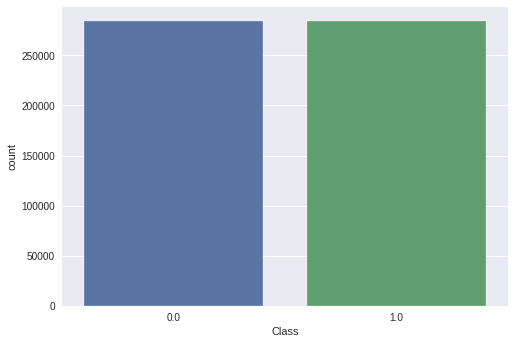

In [42]:
from imblearn.over_sampling import SMOTE
X=df.drop('Class', axis=1)
y=df['Class']
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
sns.countplot(y)

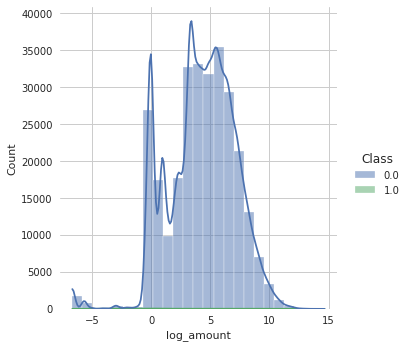

In [43]:
sns.set_style("whitegrid")
df["log_amount"] = np.log2(df["Amount"]+0.01)
sns.displot(x = "log_amount",bins = 25, kde = True, hue = "Class", data=df)

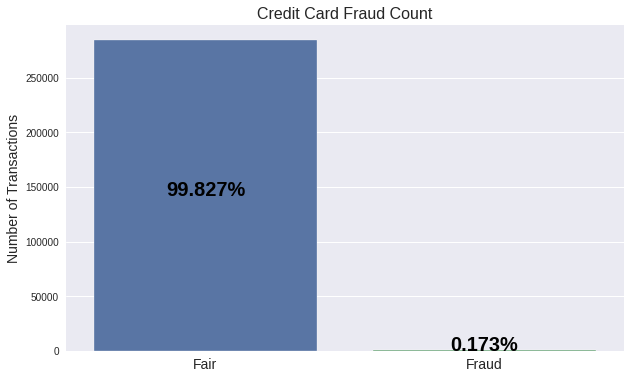

In [44]:
# Checking for class imbalance 
plt.style.use('seaborn')
fig = plt.figure(figsize = (10, 6))

ax = sns.countplot(x = 'Class', data = df)

for i in ax.patches:
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2, 
            s = f"{np.round(i.get_height()/len(df)*100, 3)}%", 
            ha = 'center', size = 20, weight = 'bold', rotation = 0, color = 'black')

plt.title("Credit Card Fraud Count", size = 16)

ax.set_xticklabels(['Fair', 'Fraud'], fontsize = 14)

plt.xlabel(None)
plt.ylabel('Number of Transactions', fontsize = 14);

Only 0.173% tractions are fraud, which is very much less than other class. If we train our model on this unbalanced class data, then the model won't learn much from Fraud class and will try to give more importance to Fair class, which we don't want. Let's see that in action, I will train a simple logistic regression model and see its performance.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



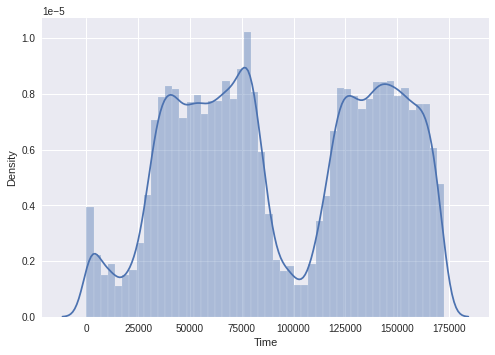

In [45]:
sns.distplot(df['Time'])
plt.show()

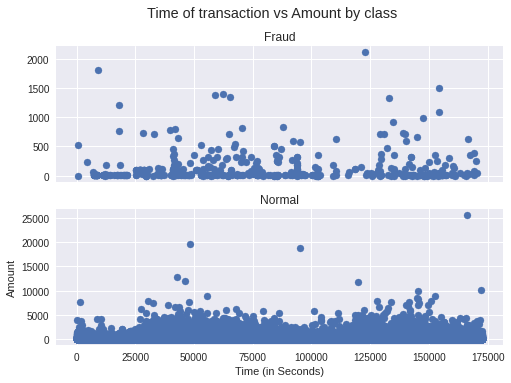

In [46]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



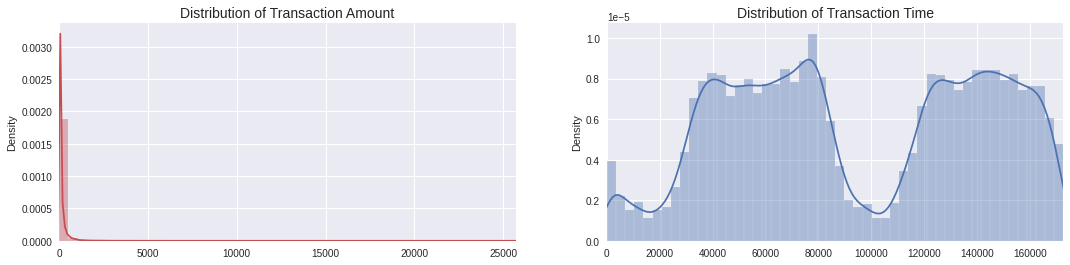

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)]);

Text(0.5, 1.0, 'BoxPlot for Amount')

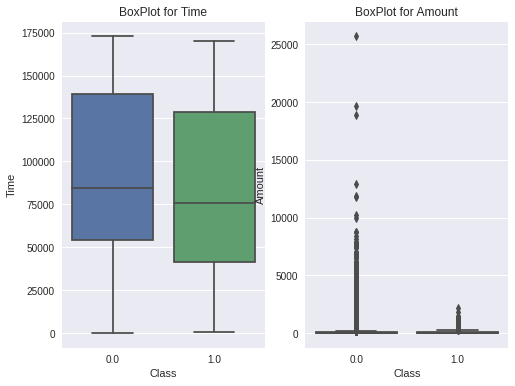

In [48]:
fig,axes = plt.subplots(1,2,figsize=(8,6))
sns.boxplot(x = df['Class'],y = df["Time"],ax=axes[0])
axes[0].set_title("BoxPlot for Time")
sns.boxplot(x = df['Class'],y = df.Amount,ax=axes[1])
axes[1].set_title("BoxPlot for Amount")

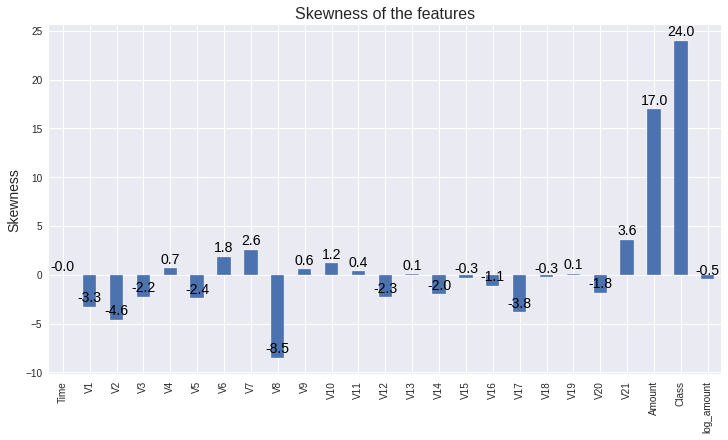

In [49]:
plt.style.use('seaborn')
fig, ax = plt.subplots(1,1, figsize = (10, 6), constrained_layout = True)
ax = df.skew(axis = 0).plot(kind = 'bar')

for i in ax.patches:
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()+0.5, 
            s = f"{np.round(i.get_height(), 1)}", 
            ha = 'center', size = 14, rotation = 0, color = 'black')
    
ax.set_ylabel('Skewness', fontsize = 14)
ax.set_title('Skewness of the features', fontsize = 16);

Imbalanced classifications pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class. This results in models that have poor predictive performance, specifically for the minority class.

# Outlier Imbalance Handling

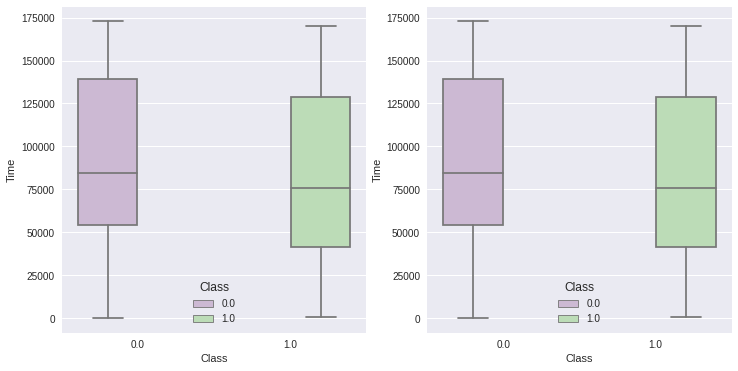

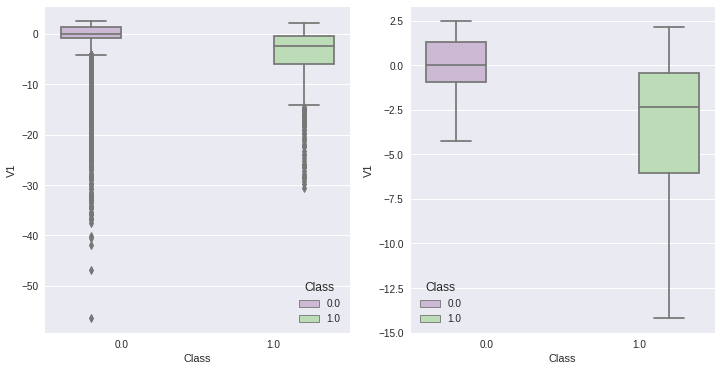

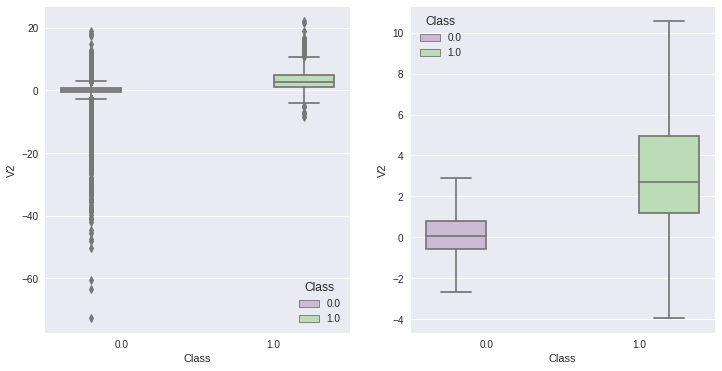

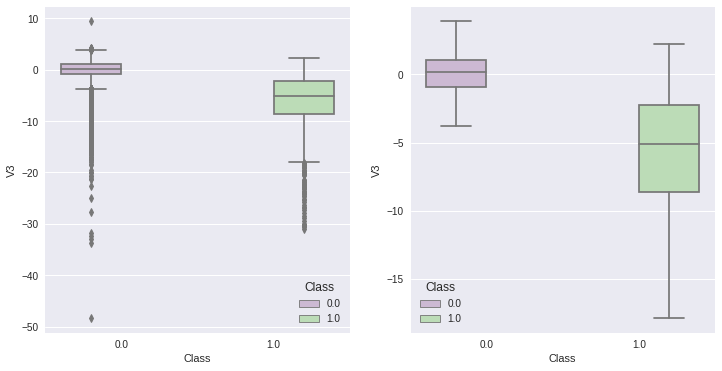

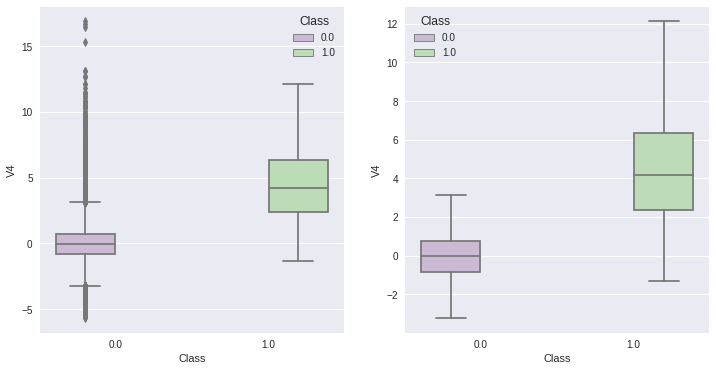

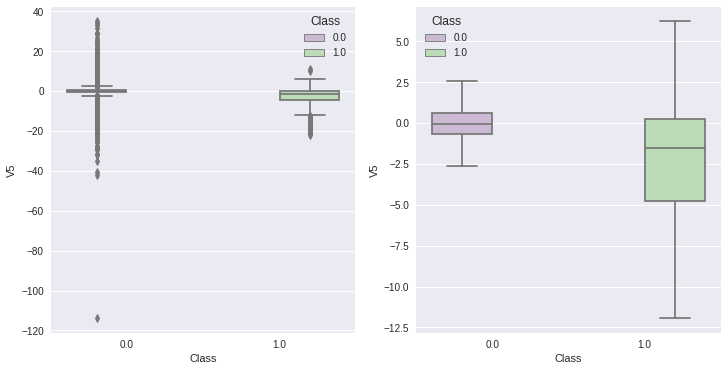

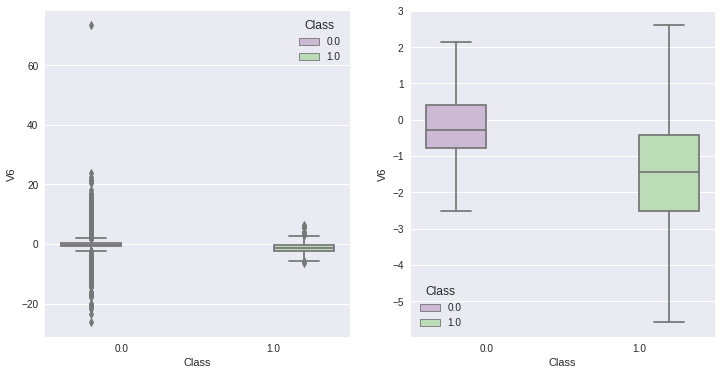

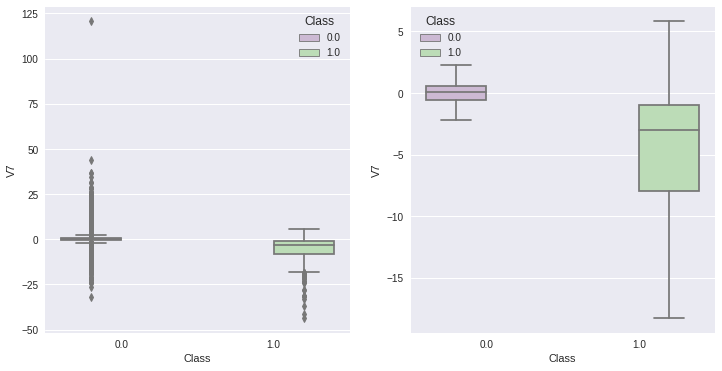

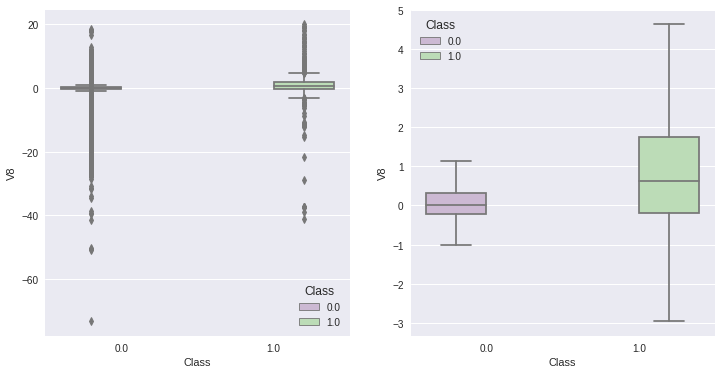

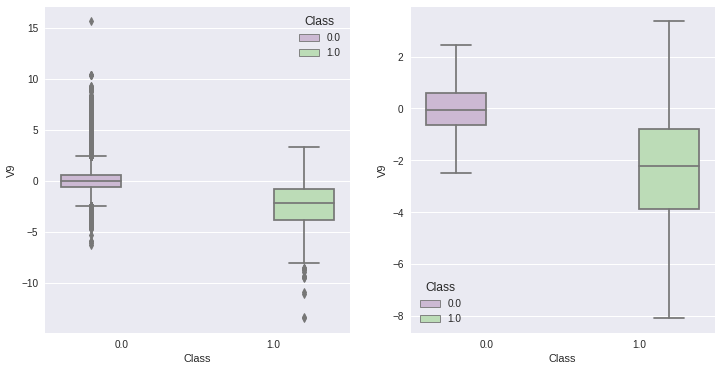

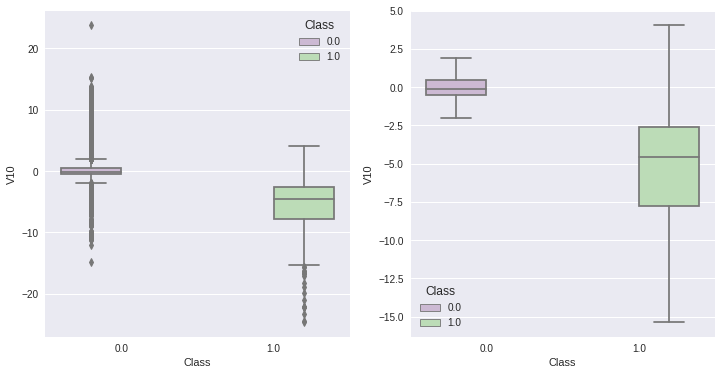

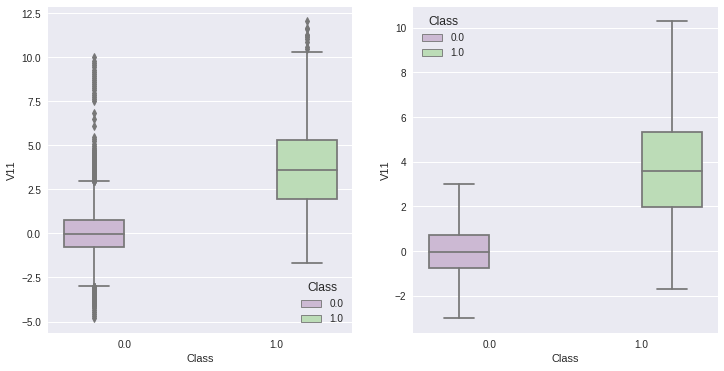

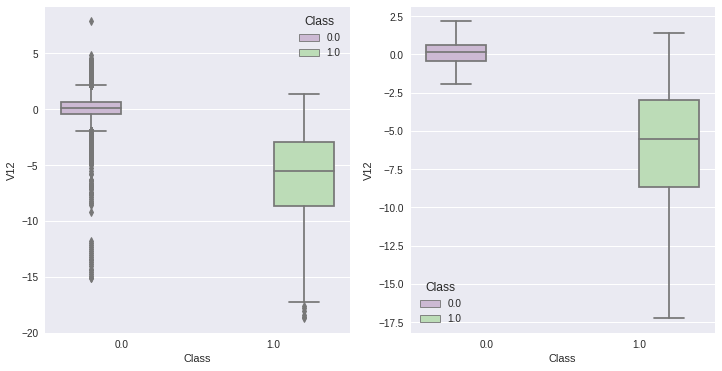

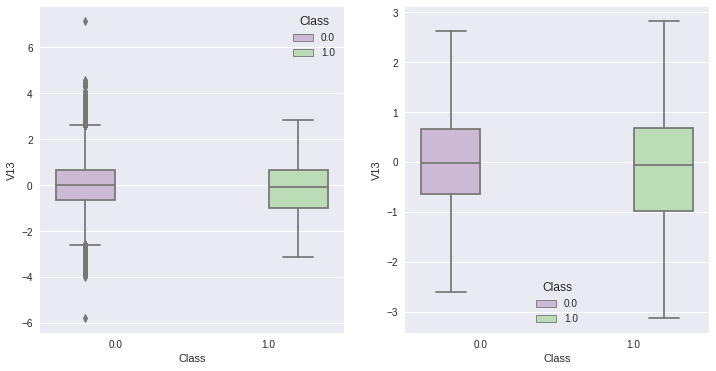

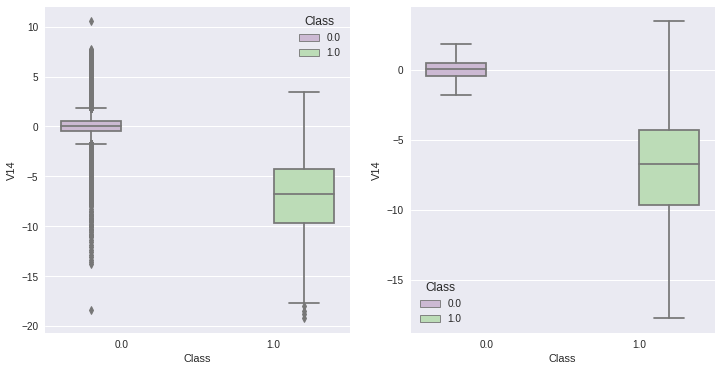

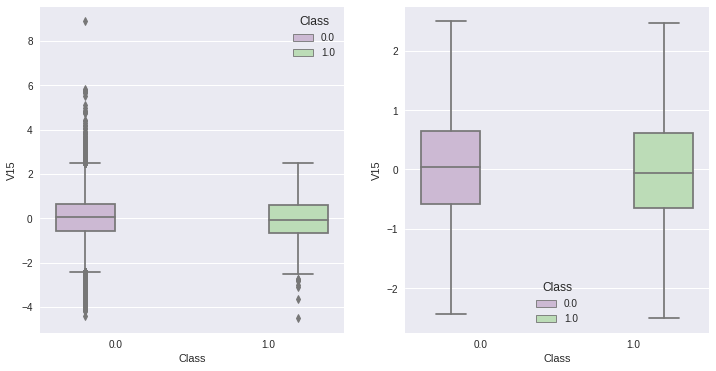

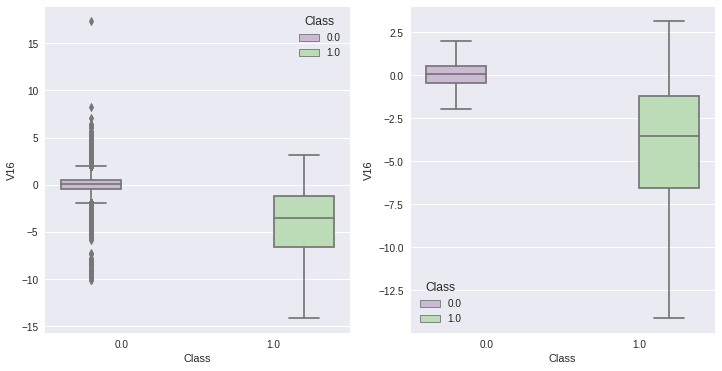

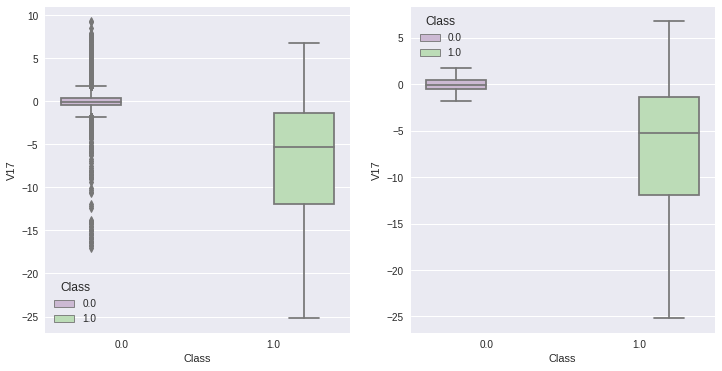

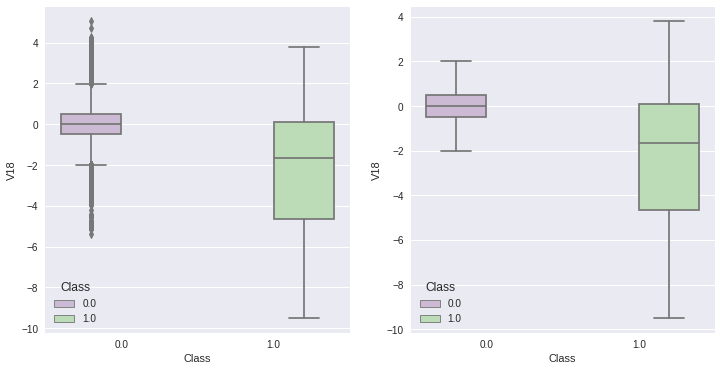

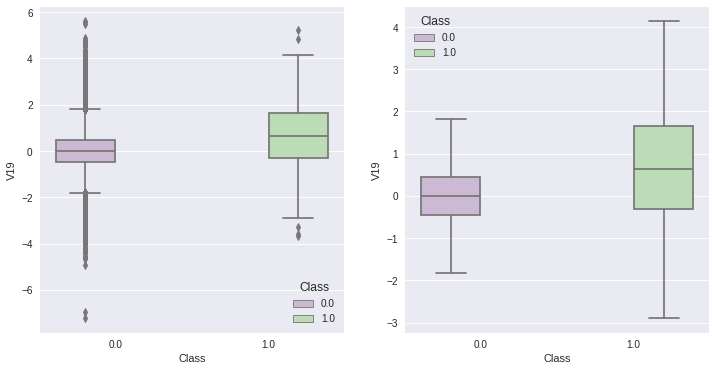

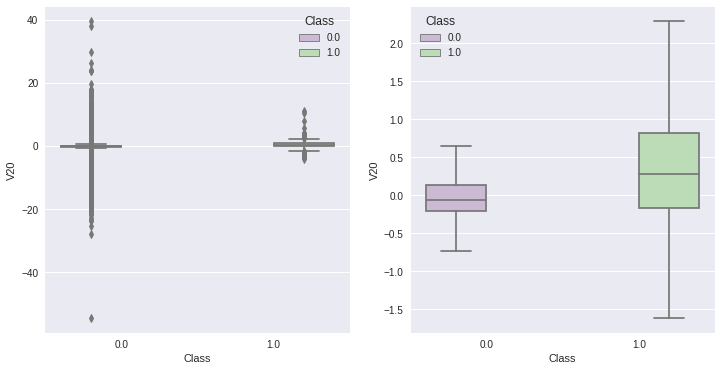

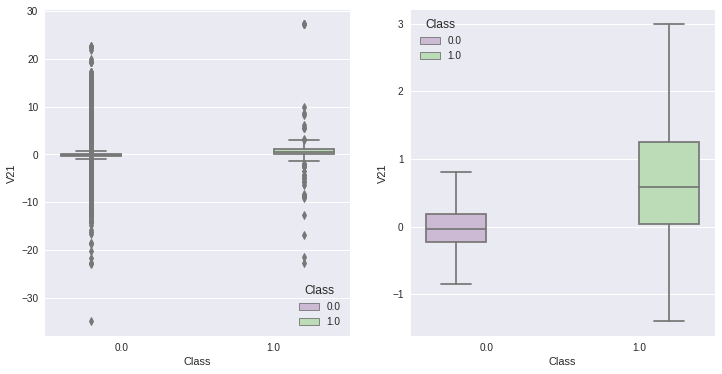

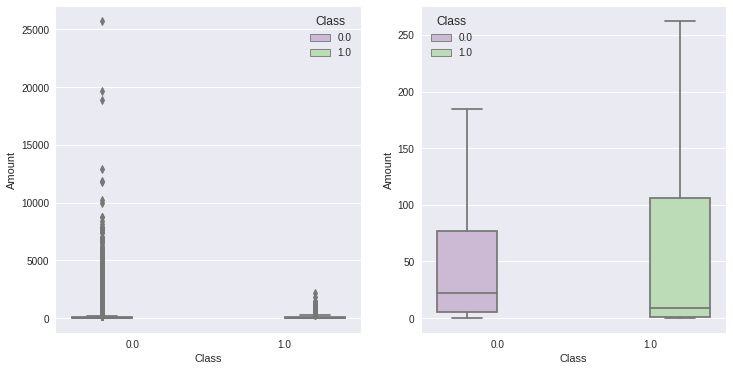

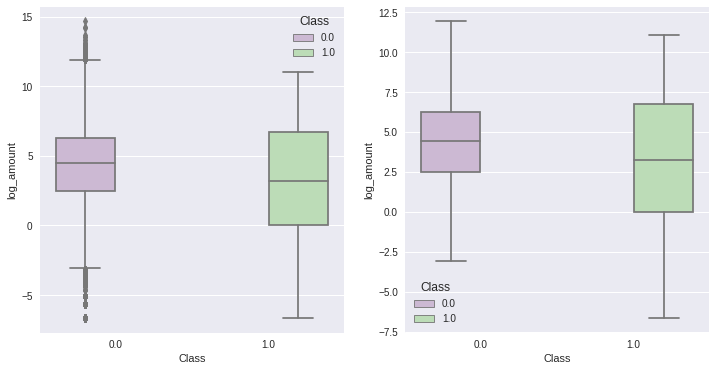

In [50]:
# Transaction amount 
data=df.copy()
data.drop(columns=['Class'], inplace = True)
for i in data.columns:
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
  s = sns.boxplot(ax = ax1, x="Class", y=i, hue="Class",data=df, palette="PRGn",showfliers=True)
  s = sns.boxplot(ax = ax2, x="Class", y=i, hue="Class",data=df, palette="PRGn",showfliers=False)
  plt.show();

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/di

<Figure size 576x396 with 0 Axes>

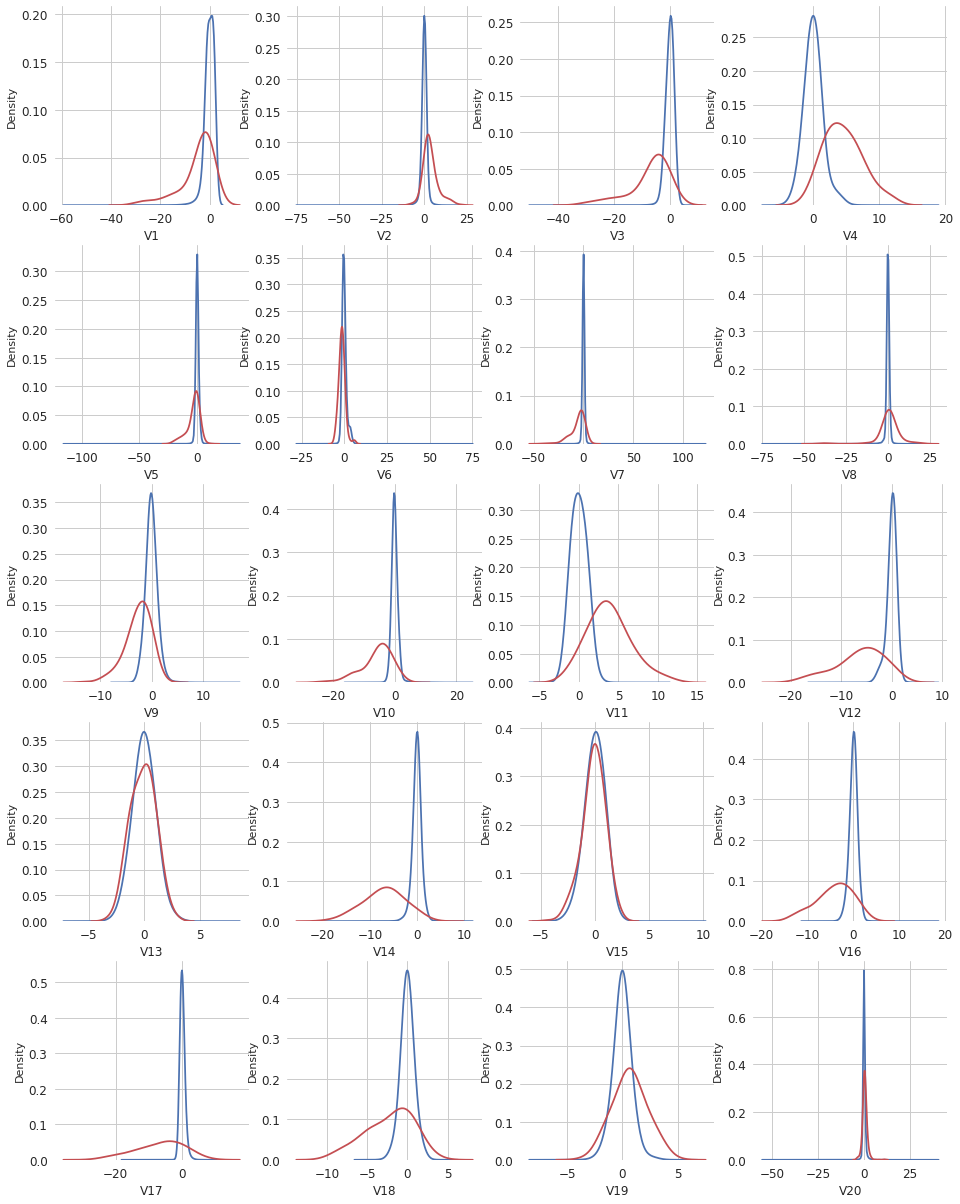

In [107]:
#Features density plot
df3 = pd.read_csv(PATH)
data = df3[['Amount', 'Class']]
df2 = data.fillna(0.0)
df2.isnull().sum()
df3 = df3.dropna(axis=1)
df3= df3.join(df2)
df3.drop(df[df['Class'] < 0].index, inplace=True)
col = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20'
       ]

i = 0
t0 = df3.loc[df3['Class'] == 0]
t1 = df3.loc[df3['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(3,7,figsize=(16,30))

for feature in col:
    i += 1
    plt.subplot(7,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0", color='b')
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1", color='r')
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

Text(0.5, 1.0, 'V1-V28 Skewnesses for Class 0')

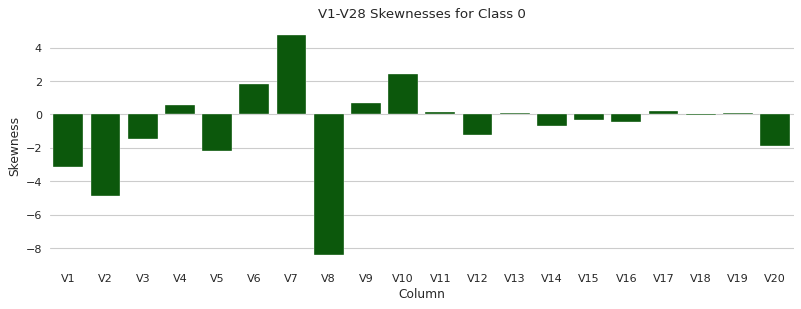

In [108]:
pca_vars = ['V%i' % k for k in range(1,21)]
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=t0[pca_vars].skew(), color='darkgreen')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.title('V1-V28 Skewnesses for Class 0')

Observations:
From the above two plots it is clearly visible that there are frauds only on the transactions which have transaction amount approximately less than 2500. Transactions which have transaction amount approximately above 2500 have no fraud.
As per with the time, the frauds in the transactions are evenly distributed throughout time

In [54]:
df = df[['Time','Amount', 'Class']]
countLess = df[df['Amount'] < 2500]
countMore = df.shape[0] - len(countLess)
percentage = round((len(countLess)/df.shape[0])*100,2)
Class_1 = countLess[countLess['Class'] == 1]
print('Total number for transaction less than 2500 is {}'.format(len(countLess)))
print('Total number for transaction more than 2500 is {}'.format(countMore))
print('{}% of transactions having transaction amount less than 2500' .format(percentage))
print('{} fraud transactions in data where transaction amount is less than 2500' .format(len(Class_1)))

Total number for transaction less than 2500 is 284357
Total number for transaction more than 2500 is 449
99.84% of transactions having transaction amount less than 2500
492 fraud transactions in data where transaction amount is less than 2500


In [55]:
from sklearn.preprocessing import StandardScaler, RobustScaler
train =  pd.read_csv(PATH)
data1=train.copy()
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

train['scaled_amount'] = std_scaler.fit_transform(train['Amount'].values.reshape(-1,1))
train['scaled_time'] = std_scaler.fit_transform(data1['Time'].values.reshape(-1,1))

train.drop(['Amount', 'Time'], axis=1, inplace = True)
scaled_amount = train['scaled_amount']
scaled_time = train['scaled_time']

train.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
train.insert(0, 'scaled_amount', scaled_amount)
train.insert(1, 'scaled_time', scaled_time)
print(train.head())

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.



   scaled_amount  scaled_time        V1  ...  Unnamed: 33  Unnamed: 34  Unnamed: 35
0       0.244966    -1.996583 -1.359807  ...          NaN          NaN          NaN
1      -0.342472    -1.996583  1.191857  ...          NaN          NaN          NaN
2       1.160687    -1.996562 -1.358354  ...          NaN          NaN          NaN
3       0.140536    -1.996562 -0.966272  ...          NaN          NaN          NaN
4      -0.073401    -1.996541 -1.158233  ...          NaN          NaN          NaN

[5 rows x 36 columns]


# Hypothesis Testing

if fraudulent transactions are in general of higher value than normal transactions or not. To check this lets do a hypothesis test. Lets define our Null and Alternative hypothesis.

H0  : Fraudulent transactions are of similar or higher value as normal transactions

HA  : Fraudulent transactions are of lower value as normal transactions

For the hypothesis test I will be performing a Z-test, with the valid transactions acting as the population. Though a T-test can also be performed but given that our sample set (fraudulent transactions) is of size 492 there shouldn't be any difference, as for sample set >= 30 the t distribution and z distribution are nearly the same.

We will be performing the test for 99% significance level, this means that we should get a z-score of atleast 2.58 or higher. formula for z-score, z−score=(x¯−μ)/S.D

Z **TEST** 

H0  : Fraudulent transactions are of similar or higher value as normal transactions

HA  : Fraudulent transactions are of lower value as normal transactions

In [56]:
from statsmodels.stats.weightstats import ztest
def ZTest(x1,value,s):

    z_value , p_value = ztest(x1 = x1,value =value )
    
    print('Z-score is :{}\n'.format(z_value))
    print('P-value is :{:.7f}\n'.format(p_value))
    
    if p_value<0.05:
      print('Null Hypothesis Rejected\n')
    else:
      print('Null Hypothesis is not Rejected\n')

    if(s=='below'):
      if(z_value<0):
        print("Alternative Hypothesis: Accepted \t Left Tailed test \n")
    else:
      if(z_value>0):
        print("Alternative Hypothesis: Accepted --> Right Tailed test \n")  

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [57]:
ZTest(df.sample(20000)['Time'],df['Time'].mean(),'above')

Z-score is :0.20526803373453084

P-value is :0.8373627

Null Hypothesis is not Rejected

Alternative Hypothesis: Accepted --> Right Tailed test 



**Inference :**
*As the P-value is not greater than 0.05 so we can reject the null hypothesis*

*so Fraudulent transactions are of similar or higher value as normal transactions*

**Chi-Squared Test**



Used to check if the categorical variables are independent.

**Features chosen : Time and Class**

**Alpha  = 0.05**

In [58]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = pd.crosstab(df['Time'],df['Class'])

In [59]:
stat, p, dof, expected = chi2_contingency(table)
# degree of freedom : (rows - 1) * (cols - 1)
print('dof=%d' % dof) 
print(expected)

dof=124590
[[1.99654502e+00 3.45498339e-03]
 [1.99654502e+00 3.45498339e-03]
 [1.99654502e+00 3.45498339e-03]
 ...
 [9.98272508e-01 1.72749170e-03]
 [1.99654502e+00 3.45498339e-03]
 [9.98272508e-01 1.72749170e-03]]


In [60]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability = %.3f \ncritical = %.3f \nChi-square value = %.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

probability = 0.950 
critical = 125412.212 
Chi-square value = 153202.516
Dependent (reject H0)


**Inference :**
So here we are rejecting the null hypothesis since the Chi-Square value is greater than the critical value.

*To conclude the two variables are dependent.* 

In [61]:
# interpret p-value
# calculate alpha
alpha = 1.0 - prob
p=0.35
print('significance = %.3f \np value = %.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

significance = 0.050 
p value = 0.350
Independent (fail to reject H0)


# Feature Scaling

In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [63]:
df.head()

,Time,Amount,Class
0,0.0,149.62,0.0
1,0.0,2.69,0.0
2,1.0,378.66,0.0
3,1.0,123.50,0.0
4,2.0,69.99,0.0


In [64]:
transform = MinMaxScaler()
data = df[['Time', 'Amount', 'Class']]
df[['Time', 'Amount', 'Class']] = transform.fit_transform(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3076: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3041: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [65]:
df[[ 'Time', 'Amount']]

,Time,Amount
0,0.000000,0.005824
1,0.000000,0.000105
2,0.000006,0.014739
3,0.000006,0.004807
4,0.000012,0.002724
...,...,...
284802,0.999965,0.000030
284803,0.999971,0.000965
284804,0.999977,0.002642
284805,0.999977,0.000389


In [66]:
X = df['Time']
Y = df['Class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Model Comparision

# KNN

In [67]:
features_columns = df.columns[:-1]

In [68]:
X = df[features_columns]
y= df['Class']

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [70]:
train_X, test_X, train_y, test_y= train_test_split(X, y, train_size= 0.80, random_state= 14)

In [71]:
print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

(227844, 2) (227844,)
(56962, 2) (56962,)


In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
from xgboost import XGBClassifier
xgb_model= XGBClassifier().fit(train_X,train_y)
xgb_y_predict=xgb_model.predict(test_X)
xgb_score=accuracy_score(xgb_y_predict,test_y)
print(xgb_score)

0.9984199992977775


In [73]:
# balancing the train data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 14)
resample_X, resample_y = smote.fit_resample(train_X, train_y)

In [74]:
print(resample_X.shape, resample_y.shape)

(454884, 2) (454884,)


In [75]:
clf = KNeighborsClassifier(n_neighbors=6)

In [76]:
clf.fit(resample_X, resample_y)

KNeighborsClassifier(n_neighbors=6)

In [77]:
y_predict=clf.predict(test_X)

In [78]:
clf.predict(test_X)

array([0., 0., 0., ..., 0., 0., 0.])

In [79]:
clf.score(test_X,test_y)

0.8825357255714336

In [80]:

accuracy_score(test_y, y_predict)
recall_score(test_y, y_predict)
precision_score(test_y, y_predict)

0.004801200300075019

In [81]:
confusion_matrix(test_y, y_predict)
tn,fn, fp, tp = confusion_matrix(test_y, y_predict).ravel()
print('true_negative : ', tn)
print('false_negative : ', fn)
print('false_poesitive : ', fp)
print('True_positive : ', tp)

true_negative :  50239
false_negative :  6633
false_poesitive :  58
True_positive :  32


In [82]:
clf.predict_proba(test_X)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [83]:
clf.predict_proba(test_X)[:,1]

array([0., 0., 0., ..., 0., 0., 0.])

In [84]:
print('Area under ROC Curve : ', roc_auc_score(test_y, clf.predict_proba(test_X)[:,1]))

Area under ROC Curve :  0.6657044669511261


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



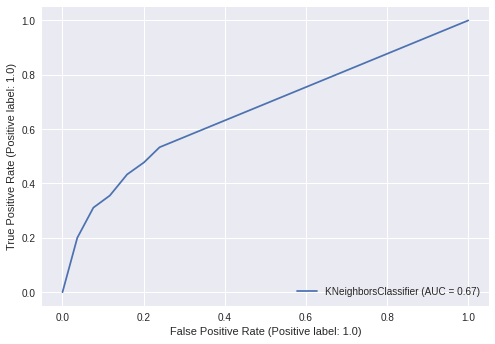

In [85]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, test_X, test_y)

# Logistic Regression

In [86]:
features_columns = df.columns[:-1]

In [87]:
X = df[features_columns]
y= df['Class']

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [90]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(227844, 2) (227844,)
(56962, 2) (56962,)


In [91]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [92]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [93]:
predict = logistic.predict(X_test)
print(accuracy_score(y_test,predict))

0.9984551104244935


In [94]:
logistic.score(X_test,y_test)

0.9984551104244935

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56874
         1.0       0.00      0.00      0.00        88

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [96]:
from sklearn.metrics import confusion_matrix, roc_auc_score
confusion_matrix(y_test,predict)


array([[56874,     0],
       [   88,     0]])

In [97]:

tn,fn, fp, tp = confusion_matrix(y_test,predict).ravel()
print('true_negative : ', tn)
print('false_negative : ', fn)
print('false_poesitive : ', fp)
print('True_positive : ', tp)

true_negative :  56874
false_negative :  0
false_poesitive :  88
True_positive :  0


In [98]:

print('Area under ROC Curve : ', roc_auc_score(y_test, clf.predict_proba(test_X)[:,1]))

Area under ROC Curve :  0.5172964080087722


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



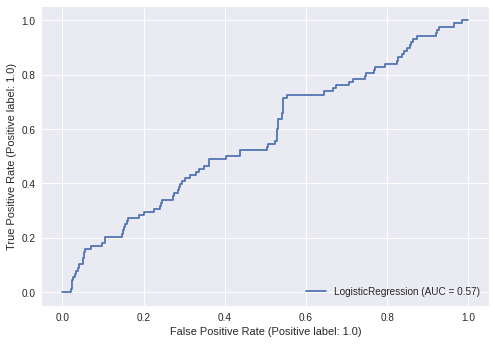

In [99]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(logistic, X_test, y_test)

**By Compaing models We can Say That The Logistic Regression is The Perfect Model for This DatA Set to give the Predictions **